정리 노션

https://www.notion.so/UCB-21ed36fbef8580589dbbdaa97e8e1cfa?source=copy_link

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
np.random.seed(42)
true_means = [0.1, 0.5, 0.3, 0.8, 0.6]
n_arms = 5
n_steps = 250
n_runs = 200

In [16]:
def run_epsilon_greedy_annealing():
    best_arm_counts = np.zeros(n_steps)
    avg_rewards = np.zeros(n_steps)
    all_rewards = np.zeros((n_runs, n_steps))
    for i in range(n_runs):
        counts = np.zeros(n_arms)
        values = np.zeros(n_arms)
        rewards = []
        for t in range(n_steps):
            epsilon = 1 / (t + 1)
            if np.random.rand() < epsilon:
                action = np.random.randint(n_arms)
            else:
                action = np.argmax(values)
            reward = np.random.rand() < true_means[action]
            counts[action] += 1
            values[action] += (reward - values[action]) / counts[action]
            rewards.append(reward)
            if action == np.argmax(true_means):
                best_arm_counts[t] += 1
        avg_rewards += np.cumsum(rewards)
        all_rewards[i] = rewards
    return best_arm_counts / n_runs, avg_rewards / n_runs, np.mean(all_rewards, axis=0)

def run_softmax_annealing():
    best_arm_counts = np.zeros(n_steps)
    avg_rewards = np.zeros(n_steps)
    all_rewards = np.zeros((n_runs, n_steps))
    for i in range(n_runs):
        counts = np.zeros(n_arms)
        values = np.zeros(n_arms)
        rewards = []
        for t in range(n_steps):
            tau = 1 / np.log(t + 2)  # Temperature decay
            exp_values = np.exp(values / tau)
            probs = exp_values / np.sum(exp_values)
            action = np.random.choice(n_arms, p=probs)
            reward = np.random.rand() < true_means[action]
            counts[action] += 1
            values[action] += (reward - values[action]) / counts[action]
            rewards.append(reward)
            if action == np.argmax(true_means):
                best_arm_counts[t] += 1
        avg_rewards += np.cumsum(rewards)
        all_rewards[i] = rewards
    return best_arm_counts / n_runs, avg_rewards / n_runs, np.mean(all_rewards, axis=0)

def run_ucb1():
    best_arm_counts = np.zeros(n_steps)
    avg_rewards = np.zeros(n_steps)
    all_rewards = np.zeros((n_runs, n_steps))
    for i in range(n_runs):
        counts = np.zeros(n_arms)
        values = np.zeros(n_arms)
        rewards = []
        for t in range(n_steps):
            if 0 in counts:
                action = np.argmin(counts)
            else:
                confidence_bounds = values + np.sqrt((2 * np.log(t + 1)) / counts)
                action = np.argmax(confidence_bounds)
            reward = np.random.rand() < true_means[action]
            counts[action] += 1
            values[action] += (reward - values[action]) / counts[action]
            rewards.append(reward)
            if action == np.argmax(true_means):
                best_arm_counts[t] += 1
        avg_rewards += np.cumsum(rewards)
        all_rewards[i] = rewards
    return best_arm_counts / n_runs, avg_rewards / n_runs, np.mean(all_rewards, axis=0)


In [17]:
# Run simulations
eps_greedy_best, eps_greedy_rewards, eps_greedy_avg = run_epsilon_greedy_annealing()
softmax_best, softmax_rewards, softmax_avg = run_softmax_annealing()
ucb_best, ucb_rewards, ucb_avg = run_ucb1()

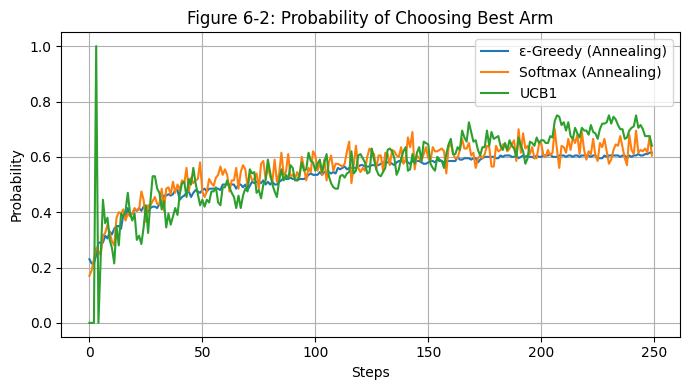

In [18]:
# Plot Figure 6-2: Probability of Choosing Best Arm
plt.figure(figsize=(7, 4))
plt.plot(eps_greedy_best, label="ε-Greedy (Annealing)")
plt.plot(softmax_best, label="Softmax (Annealing)")
plt.plot(ucb_best, label="UCB1")
plt.title("Figure 6-2: Probability of Choosing Best Arm")
plt.xlabel("Steps")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

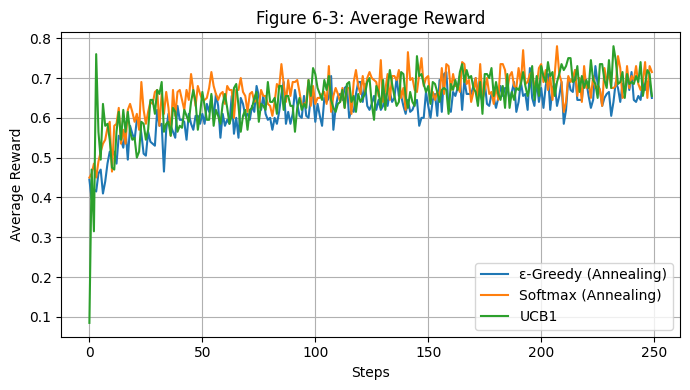

In [19]:
# Plot Figure 6-3: Average Reward
plt.figure(figsize=(7, 4))
plt.plot(eps_greedy_avg, label="ε-Greedy (Annealing)")
plt.plot(softmax_avg, label="Softmax (Annealing)")
plt.plot(ucb_avg, label="UCB1")
plt.title("Figure 6-3: Average Reward")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

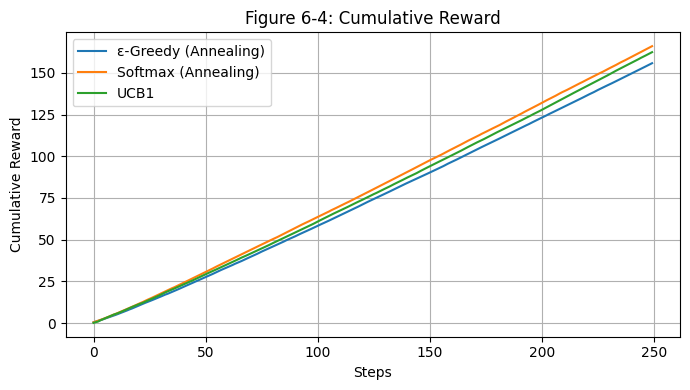

In [20]:
# Plot Figure 6-4: Cumulative Reward
plt.figure(figsize=(7, 4))
plt.plot(eps_greedy_rewards, label="ε-Greedy (Annealing)")
plt.plot(softmax_rewards, label="Softmax (Annealing)")
plt.plot(ucb_rewards, label="UCB1")
plt.title("Figure 6-4: Cumulative Reward")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Excercises
## 1. arm들간의 유사성이 UCB1에 어떤 영향을 미칠까?


> "epsilon-Greedy와 Softmax는 bandit의 arm들 간의 차이가 클 때 행동 양상이 달라진다고 했음. 그렇다면 UCB1은 arm들 간의 유사성이 클 때, 작을 때 어떻게 행동할것인가?"

예를 들어 각 arm의 실제 보상 확률이 [0.1, 0.9]처럼 아주 다를 때와 [0.48, 0.50, 0.52]처럼 비슷할 때, UCB1이 어떻게 작동할지 비교해 보자.



In [30]:
np.random.seed(42)

n_arms = 3
n_steps = 250
n_runs = 200


In [31]:
true_means_distinct = [0.1, 0.5, 0.9]
true_means_similar = [0.48, 0.50, 0.52]

def run_ucb1(true_means):
    best_arm_counts = np.zeros(n_steps)
    avg_rewards = np.zeros(n_steps)
    for _ in range(n_runs):
        counts = np.zeros(n_arms)
        values = np.zeros(n_arms)
        rewards = []
        for t in range(n_steps):
            if 0 in counts:
                action = np.argmin(counts)
            else:
                confidence_bounds = values + np.sqrt((2 * np.log(t + 1)) / counts)
                action = np.argmax(confidence_bounds)
            reward = np.random.rand() < true_means[action]
            counts[action] += 1
            values[action] += (reward - values[action]) / counts[action]
            rewards.append(reward)
            if action == np.argmax(true_means):
                best_arm_counts[t] += 1
        avg_rewards += np.cumsum(rewards)
    return best_arm_counts / n_runs, avg_rewards / n_runs

best_distinct, reward_distinct = run_ucb1(true_means_distinct)
best_similar, reward_similar = run_ucb1(true_means_similar)


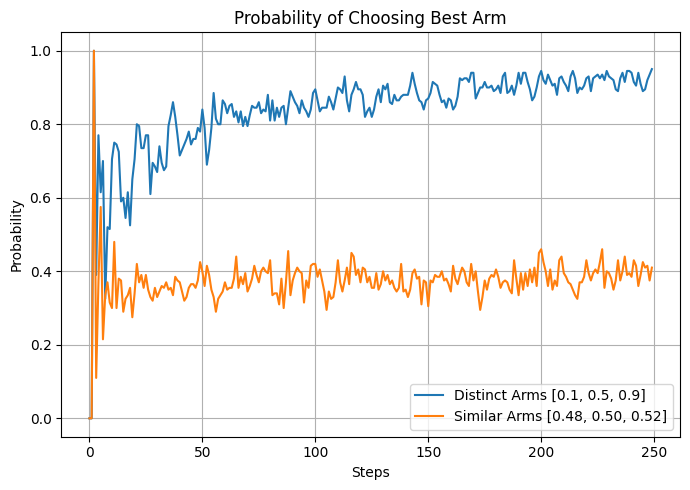

In [34]:
#최적의 arm 선택 확률
plt.figure(figsize=(7, 5))
plt.plot(best_distinct, label="Distinct Arms [0.1, 0.5, 0.9]")
plt.plot(best_similar, label="Similar Arms [0.48, 0.50, 0.52]")
plt.title("Probability of Choosing Best Arm")
plt.xlabel("Steps")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- UCB1은 arm들 간의 차이가 클수록(best arm이 분명할수록) 빠르게 최적 팔을 식별.

- arm들이 유사할 경우에는 더 많은 탐색이 필요해서 수렴 속도가 느려짐.

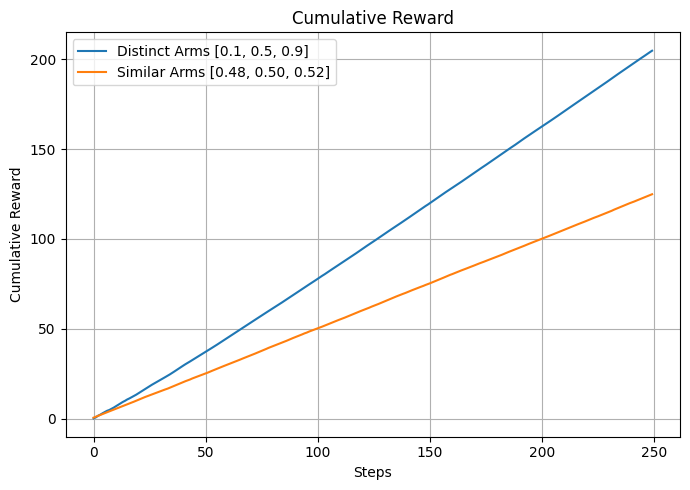

In [35]:
# 누적 보상
plt.figure(figsize=(7, 5))
plt.plot(reward_distinct, label="Distinct Arms [0.1, 0.5, 0.9]")
plt.plot(reward_similar, label="Similar Arms [0.48, 0.50, 0.52]")
plt.title("Cumulative Reward")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

arm들 간의 차이가 큰 경우 누적 보상이 빠르게 증가하고,

비슷한 경우에는 탐색 때문에 속도가 다소 느림

## 2.  더 긴 시간 동안 실행하면 Softmax를 따라잡을까?



> "그래프에서 UCB1이 Softmax에 뒤처지긴 했지만 끝부분에서는 따라잡는 듯한 모습을 보였음. 만약 250이 아니라 500 스텝까지 실험했다면 결과가 달랐을까?"



In [36]:
true_means = [0.1, 0.5, 0.3, 0.8, 0.6]
n_arms = len(true_means)
n_steps = 500   # ← horizon을 500으로 설정
n_runs = 200

# UCB1
def run_ucb1():
    best_arm_counts = np.zeros(n_steps)
    cumulative_rewards = np.zeros(n_steps)
    for _ in range(n_runs):
        counts = np.zeros(n_arms)
        values = np.zeros(n_arms)
        rewards = []
        for t in range(n_steps):
            if 0 in counts:
                action = np.argmin(counts)
            else:
                confidence_bounds = values + np.sqrt((2 * np.log(t + 1)) / counts)
                action = np.argmax(confidence_bounds)
            reward = np.random.rand() < true_means[action]
            counts[action] += 1
            values[action] += (reward - values[action]) / counts[action]
            rewards.append(reward)
            if action == np.argmax(true_means):
                best_arm_counts[t] += 1
        cumulative_rewards += np.cumsum(rewards)
    return best_arm_counts / n_runs, cumulative_rewards / n_runs

# Softmax (Annealing)
def run_softmax_annealing():
    best_arm_counts = np.zeros(n_steps)
    cumulative_rewards = np.zeros(n_steps)
    for _ in range(n_runs):
        counts = np.zeros(n_arms)
        values = np.zeros(n_arms)
        rewards = []
        for t in range(n_steps):
            tau = 1 / np.log(t + 2)  # 온도 감소
            exp_vals = np.exp(values / tau)
            probs = exp_vals / np.sum(exp_vals)
            action = np.random.choice(n_arms, p=probs)
            reward = np.random.rand() < true_means[action]
            counts[action] += 1
            values[action] += (reward - values[action]) / counts[action]
            rewards.append(reward)
            if action == np.argmax(true_means):
                best_arm_counts[t] += 1
        cumulative_rewards += np.cumsum(rewards)
    return best_arm_counts / n_runs, cumulative_rewards / n_runs

# 실행
ucb_best, ucb_rewards = run_ucb1()
softmax_best, softmax_rewards = run_softmax_annealing()


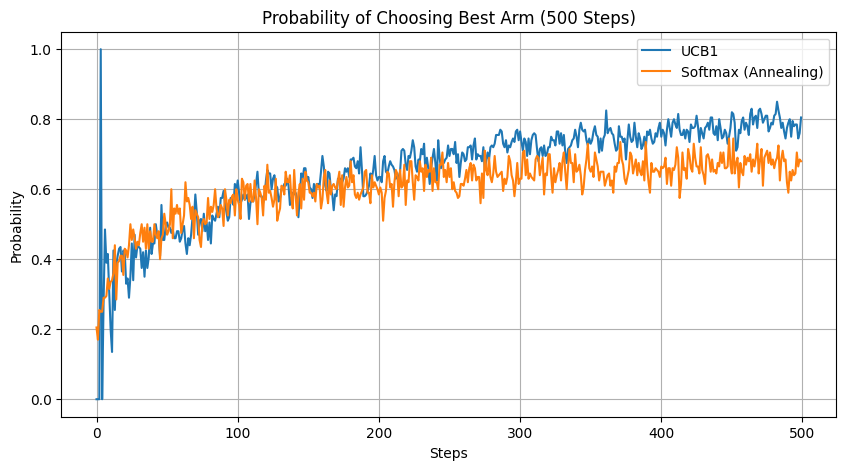

In [37]:
# 최적 arm 선택 확률
plt.figure(figsize=(10, 5))
plt.plot(ucb_best, label="UCB1")
plt.plot(softmax_best, label="Softmax (Annealing)")
plt.title("Probability of Choosing Best Arm (500 Steps)")
plt.xlabel("Steps")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

초기에는 Softmax가 더 좋은 성능을 보이지만, 시간이 지남에 따라 UCB1이 최적 arm을 더 자주 선택하게 됨.

탐험이 충분히 이뤄졌을 때는 UCB1이 더 효과적으로 최적 arm을 식별함.

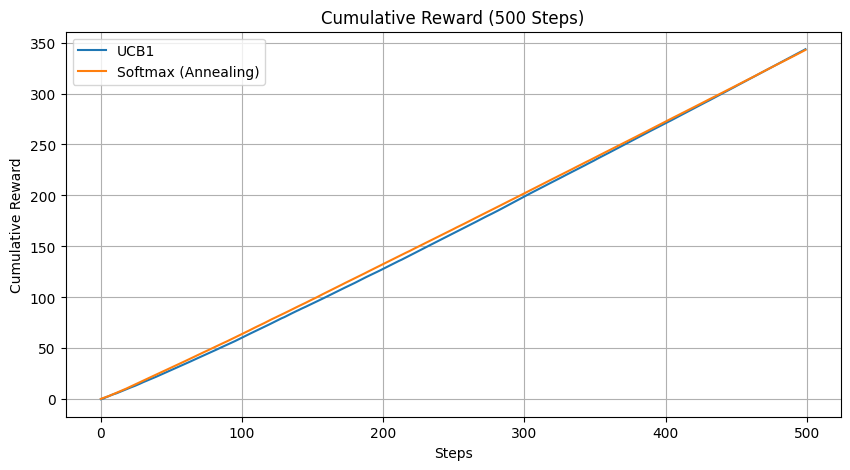

In [38]:
# 그래프: 누적 보상
plt.figure(figsize=(10, 5))
plt.plot(ucb_rewards, label="UCB1")
plt.plot(softmax_rewards, label="Softmax (Annealing)")
plt.title("Cumulative Reward (500 Steps)")
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()

두 알고리즘 모두 선형에 가까운 누적 보상 증가를 보임.

시간이 충분히 주어지면, UCB1은 초기의 탐험 비용을 극복하고 Softmax보다 더 나은 성능을 낼 수 있음.

이는 UCB1의 탐험 전략(신뢰 구간 기반 선택)이 장기적으로 효과적임.
따라서 긴 horizon(실험 시간)이 보장되는 환경일수록 UCB1의 성능이 부각됨.

## 3. Arm 수 증가가 UCB1 성능에 미치는 영향
UCB1은 처음에 모든 arm을 한 번씩 시도함. arm이 많아지면 초기 탐험에 많은 시간이 소모되고, 결국 좋은 arm을 찾을 기회가 줄어들 수 있음.



> arm 수가 많아질 때 horizon에 따라 UCB1이 얼마나 성능이 떨어지는지 또는 회복하는지를 비교



Horizon(총 시도 수): 250,1000

UCB1 알고리즘을 사용하여 Arm 수를 5, 20, 100, 500개로 변화시킴


In [50]:
np.random.seed(42)
n_runs = 200
arm_sizes = [5, 20, 100, 500]
horizons = [250, 1000]  # 실험 step 수

In [57]:
def run_ucb1_experiment(n_arms, n_steps):
    true_means = np.random.rand(n_arms)  # 각 arm의 실제 보상 확률
    best_arm = np.argmax(true_means)

    best_arm_counts = np.zeros(n_steps)
    avg_cum_rewards = np.zeros(n_steps)

    for _ in range(n_runs):
        counts = np.zeros(n_arms)
        values = np.zeros(n_arms)
        rewards = []

        for t in range(n_steps):
            if 0 in counts:
                action = np.argmin(counts)
            else:
                confidence_bounds = values + np.sqrt((2 * np.log(t + 1)) / counts)
                action = np.argmax(confidence_bounds)

            reward = np.random.rand() < true_means[action]
            counts[action] += 1
            values[action] += (reward - values[action]) / counts[action]

            rewards.append(reward)
            if action == best_arm:
                best_arm_counts[t] += 1

        avg_cum_rewards += np.cumsum(rewards)

    return best_arm_counts / n_runs, avg_cum_rewards / n_runs

# 실험 실행 및 결과 저장
results_best_prob = {}
results_cum_reward = {}

for h in horizons:
    results_best_prob[h] = {}
    results_cum_reward[h] = {}
    for k in arm_sizes:
        best_probs, cum_rewards = run_ucb1_experiment(n_arms=k, n_steps=h)
        results_best_prob[h][k] = best_probs
        results_cum_reward[h][k] = cum_rewards


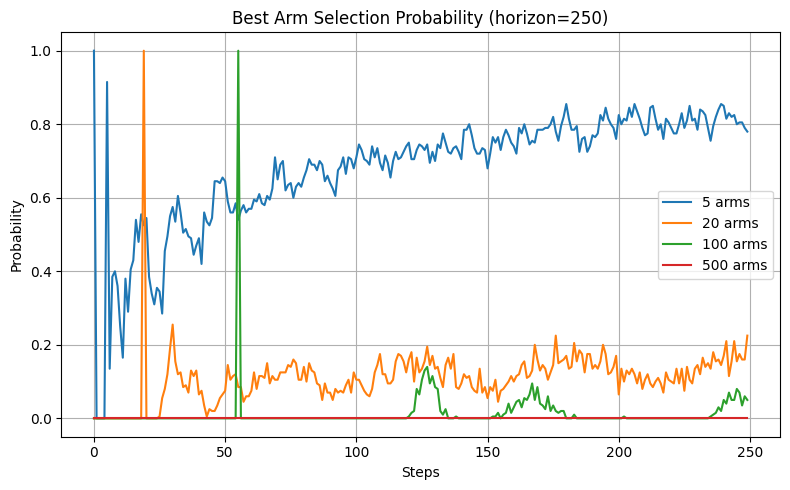

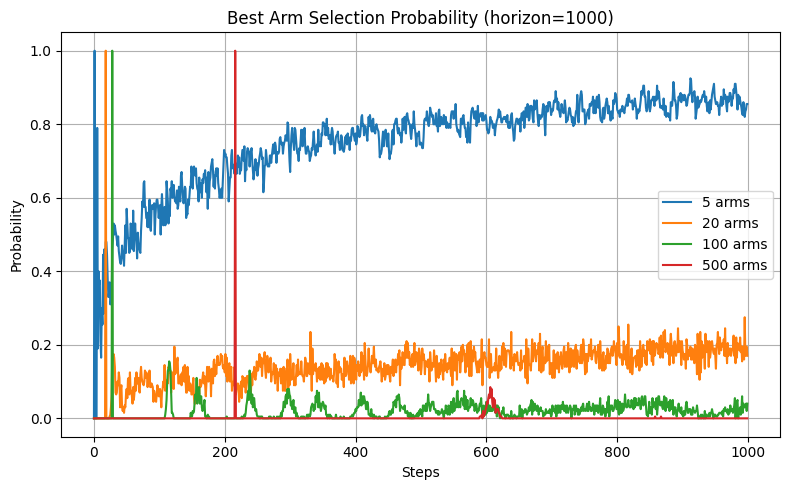

In [59]:
# 최적 arm 선택 확률 그래프
for h in horizons:
    plt.figure(figsize=(8, 5))
    for k in arm_sizes:
        plt.plot(results_best_prob[h][k], label=f"{k} arms")
    plt.title(f"Best Arm Selection Probability (horizon={h})")
    plt.xlabel("Steps")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Horizon = 250 (짧은 시간)

5 arms: 빠르게 수렴하며, 약 70%까지 최적 arm 선택 확률 상승.

20 arms: 수렴이 느려지고, 약 20% 수준에 머무름.

100 arms / 500 arms: 대부분의 시간을 탐험에 사용 → 최적 arm 선택 확률이 매우 낮음 (0%에 가까움).

✅결론: arm 수가 많고 시간이 짧으면, 탐험에 대부분의 스텝을 사용하므로 좋은 arm을 제대로 이용하지 못함.

### Horizon = 1000 (충분한 시간)

5 arms: 빠르게 70% 이상 수렴. Horizon이 늘어나도 좋은 성능 유지.

20 arms: 약 20~25%로 향상되지만 여전히 낮음.

100 arms: 천천히 상승, 약 10%까지 향상.

500 arms: 여전히 매우 낮음, 수렴 거의 없음.

✅결론: 시간이 늘어나면 탐험 후 좋은 arm을 활용할 기회가 생기지만, arm 수가 매우 많으면 1000 스텝도 부족함.

UCB1은 arm이 적고 시간이 충분할 때 강력함.

하지만 arm 수가 많아지면 초기 탐험 비용이 커져서 Horizon이 짧을 경우 성능이 급격히 저하됨.

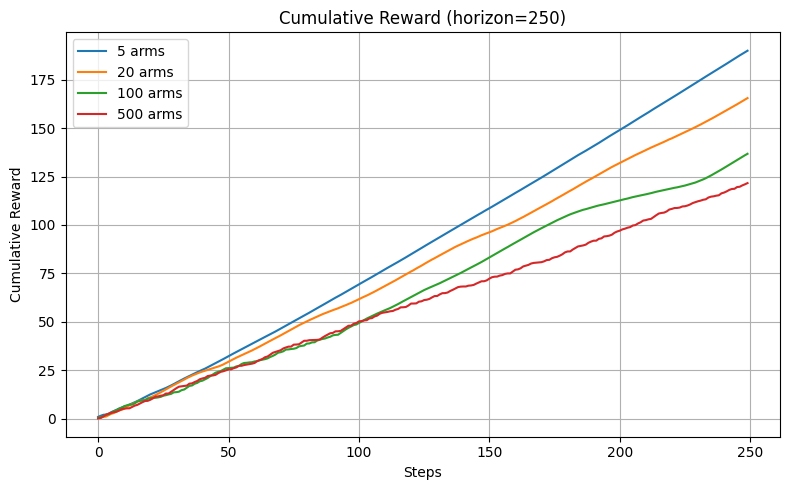

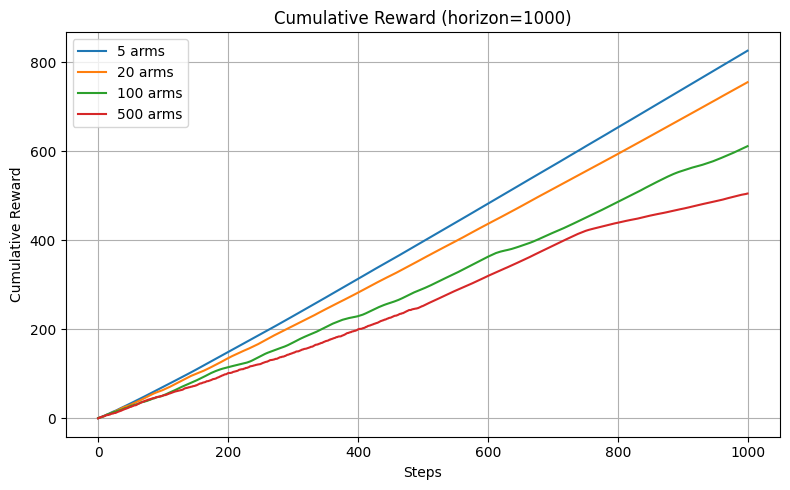

In [60]:
# 누적 보상 그래프
for h in horizons:
    plt.figure(figsize=(8, 5))
    for k in arm_sizes:
        plt.plot(results_cum_reward[h][k], label=f"{k} arms")
    plt.title(f"Cumulative Reward (horizon={h})")
    plt.xlabel("Steps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Horizon 250:

- arm 수가 적을수록 보상이 높음. 탐험 시간이 짧아 실제 보상 높은 arm을 자주 선택할 수 있음.

- arm 수가 많을수록 보상이 낮음. 많은 탐험 때문에 최적 arm 선택이 늦어져 보상이 낮아짐.

### Horizon 1000:

- arm 수가 적은 경우, 일찍부터 보상이 높고 꾸준히 증가.

- arm 수가 많아도, 시간이 충분하니 점차 수렴하면서 보상이 개선됨.

- 하지만 여전히 500개 arm의 경우, 다른 설정보다 느리게 증가함.